In [1]:
pwd

'/Users/alokprasad/Quantum/miniconda3/envs/q1/bin'

In [2]:
import qiskit
print(qiskit.__version__)


1.0.2


In [4]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
#
#from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum", token="66dc1570e14fc215832aa776f938f139778dee30741bb3b61dd598041c0611f4eaa56f347f02c0d0735ffefc97b0d6ac6f5762012b26af258e5452df805132e5")

# Invoke a primitive. For more details see https://docs.quantum.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

In [5]:
from qiskit import QuantumCircuit, assemble
from qiskit_aer import Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

### 2.1_Creating quantum circuit with classical register |0>

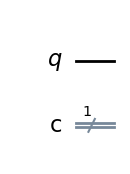

In [7]:
# Initiating the qubit in |0> and visualizing it
qc = QuantumCircuit(1,1)
qc.draw('mpl')

In [8]:
# Declaring the initizalized state as statevector (SV) object and printing in Dirac format

import qiskit.quantum_info as qi
stv1 = qi.Statevector.from_instruction(qc)
stv1.draw('latex', prefix='Statevector:')

<IPython.core.display.Latex object>

In [9]:
# Printing the matrix form of SV
print(stv1.data)
print('\n',stv1.draw())

[1.+0.j 0.+0.j]

 Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


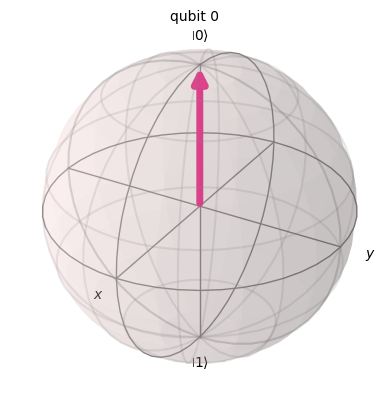

In [10]:
# Visualizing the qubit on Bloch sphere
plot_bloch_multivector(stv1)

In [11]:
# Use Aer's qasm_simulator

backend = Aer.get_backend('qasm_simulator')

qc.measure([0], [0])
print(qc)

     ┌─┐
  q: ┤M├
     └╥┘
c: 1/═╩═
      0 


In [12]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer

result = backend.run(qc, shots=10).result()

In [13]:
# Return counts
counts = result.get_counts(qc)
print("\nTotal count for 0 and 1 are:",counts)


Total count for 0 and 1 are: {'0': 10}


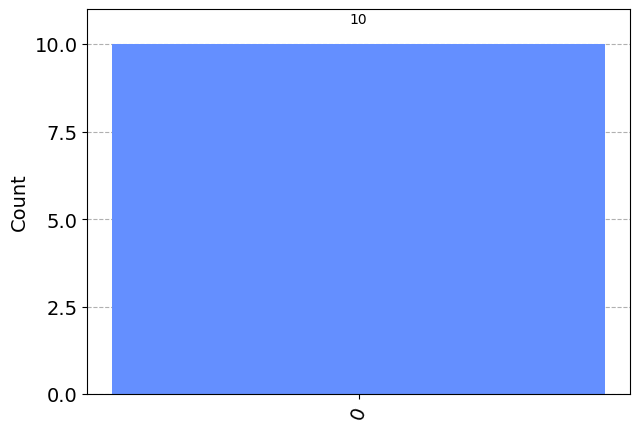

In [14]:
# Visualize # https://docs.quantum.ibm.com/lab/first-circuit # https://quantumcomputing.stackexchange.com/questions/27088/qiskit-how-to-get-statevector-for-each-shot
#----------
 
# Import draw_circuit, then use it to draw the circuit
#from ibm_quantum_widgets import draw_circuit
#draw_circuit(qc)
 
# Analyze
#--------
 
# Plot a histogram
plot_histogram(counts)
 
# END

### 2.2_Creating quantum circuit with classical register |1>

In [16]:
import numpy as np # https://docs.quantum.ibm.com/api/qiskit/0.40/qiskit.circuit.QuantumCircuit#draw
from qiskit import QuantumCircuit
 
circuit = QuantumCircuit(1)
circuit.initialize([0, 1])
circuit.draw()

┌─────────────────┐
q: ┤ Initialize(0,1) ├
   └─────────────────┘

In [17]:
# Declaring the initizalized state as statevector (SV) object and printing in Dirac format

import qiskit.quantum_info as qi
stv1 = qi.Statevector.from_instruction(circuit) 
stv1.draw('latex', prefix='Statevector:')

<IPython.core.display.Latex object>

In [18]:
# Printing the matrix form of SV
print(stv1.data)
print('\n',stv1.draw())

[0.+0.j 1.+0.j]

 Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


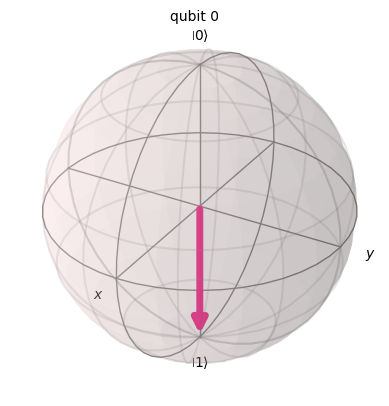

In [19]:
# Visualizing the qubit on Bloch sphere
plot_bloch_multivector(stv1)

In [20]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

cr = ClassicalRegister(1)

In [21]:
circuit.add_register(cr)

In [22]:
circuit.draw()

┌─────────────────┐
   q: ┤ Initialize(0,1) ├
      └─────────────────┘
c0: 1/═══════════════════

In [23]:
# Use Aer's qasm_simulator

backend = Aer.get_backend('qasm_simulator')

circuit.measure([0], [0])
print(circuit)

      ┌─────────────────┐┌─┐
   q: ┤ Initialize(0,1) ├┤M├
      └─────────────────┘└╥┘
c0: 1/════════════════════╩═
                          0 


In [24]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer

result = backend.run(circuit, shots=10).result()

In [25]:
# Return counts
counts = result.get_counts(circuit)
print("\nTotal count for 0 and 1 are:",counts)


Total count for 0 and 1 are: {'1': 10}


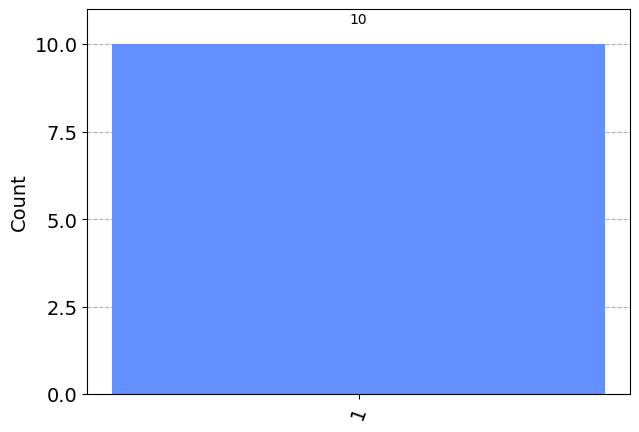

In [26]:
plot_histogram(counts)